<a href="https://colab.research.google.com/github/scottie1013/Housing-Price-Prediction/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kaggle House Price Prediction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_test = pd.read_csv('test.csv')

#exploratory data analysis

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


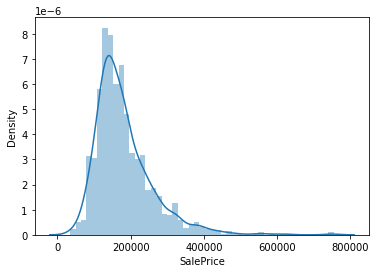

In [ ]:
# plot the sale price distribution, looks like the data is right skewed 
sns.distplot(df_train['SalePrice'])

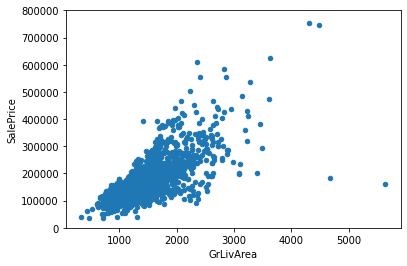

In [ ]:
#Check if there are outliers for some of the variables 
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

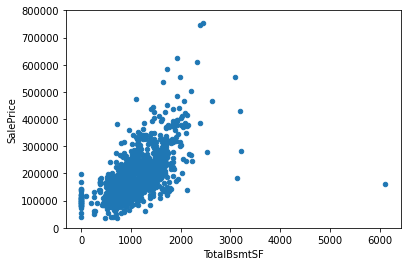

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

(-0.5, 9.5, 0.0, 800000.0)

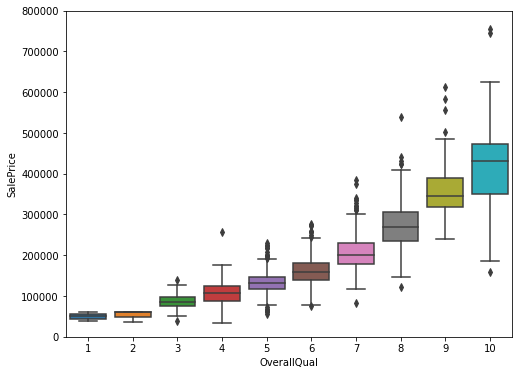

In [ ]:
#Overall material and finish quality
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=var, y ='SalePrice', data = data)
fig.axis(ymin=0, ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

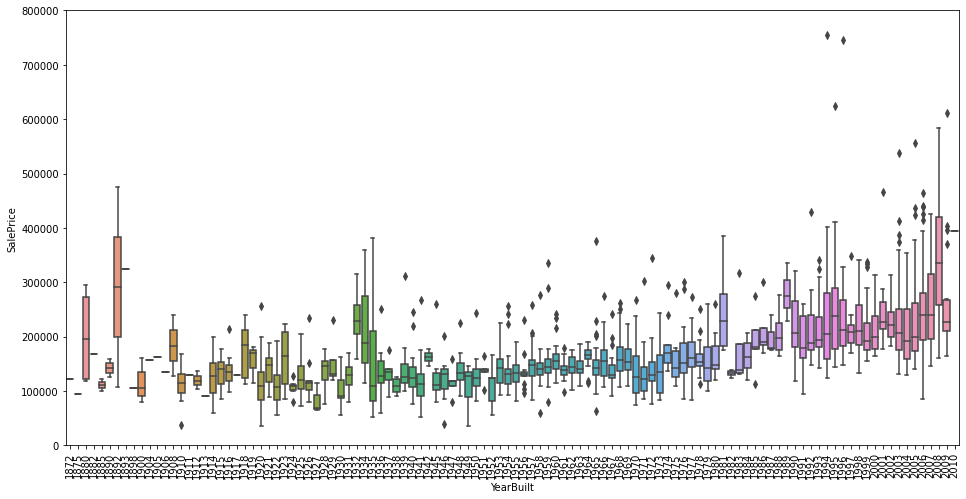

In [ ]:
#Years the house was being built
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x=var, y ='SalePrice', data = data)
fig.axis(ymin=0, ymax = 800000) ;
plt.xticks(rotation=90)

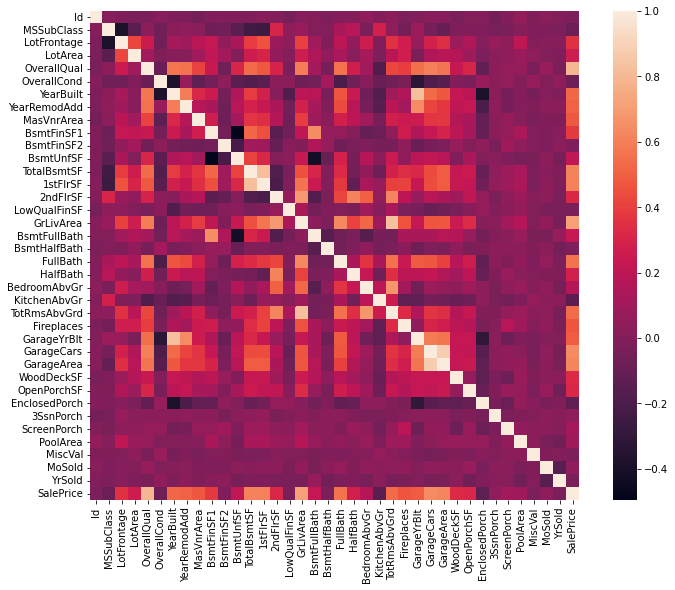

In [ ]:
#examing the correlation among features
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square= True)

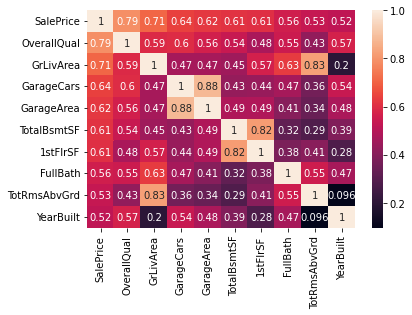

In [ ]:
#since we are only interested in what influence saleprice the most
#we take a closer look at those variables
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
hm = sns.heatmap(cm,annot = True,  yticklabels=cols, xticklabels= cols)
plt.show()

In [ ]:
#Now we take a look at the missing values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


#data cleaning and processing as well as some Feature Engineering

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [ ]:
#use all features as my features 
all_features = pd.concat((train.iloc[:,1:-1], test.iloc[:,1:]))

In [ ]:
all_features.shape

(2919, 79)

In [ ]:
all_features.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [ ]:
#by nomralizing the features, we can replace all the missing value with its mean
#in this case is all 0. An alternative solution would be to standardize the features,
#which works better here
#numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
#all_features[numeric_features] = all_features[numeric_features].apply(
#    lambda x: (x-x.mean())/(x.std()))
#all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [ ]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [ ]:
#encode discrete values, we also create labels for the missing values 
all_features = pd.get_dummies(all_features, dummy_na = True)
all_features.shape

(2919, 331)

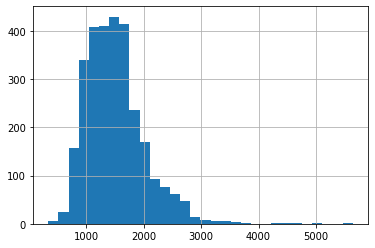

In [ ]:
#visualize some features distribution
all_features['GrLivArea'].hist(bins=30)

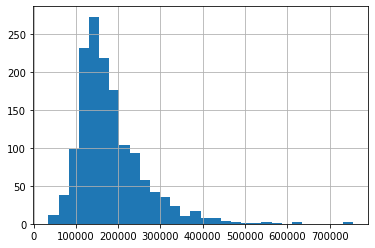

In [ ]:
df_train['SalePrice'].hist(bins=30)

looks like our Most of the data is not normaly distributed, which could cause accuracy issue when fitting in our models, therefore, we can use log transformation on the numerical datas

In [ ]:
log1p_col = ['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','BsmtUnfSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
for col in log1p_col:
    all_features[col] = all_features[col].apply(np.log1p)

In [ ]:
#Numerical columns use log transformation
df_train['SalePrice'] = df_train['SalePrice'].apply(np.log1p)

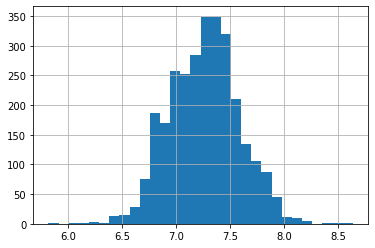

In [ ]:
all_features['GrLivArea'].hist(bins=30)

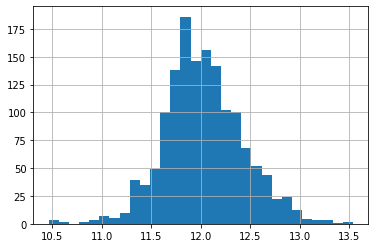

In [ ]:
df_train['SalePrice'].hist(bins=30)

In [ ]:
ntrain = df_train.shape[0]
x_train = all_features[:ntrain]
x_test = all_features[ntrain:]
y_train = df_train.pop('SalePrice')

In [ ]:
#check if there are any null data left
null_check = x_train.isnull().sum()
null_check[null_check>0]

Series([], dtype: int64)

In [ ]:
null_check = x_test.isnull().sum()
null_check[null_check>0]

Series([], dtype: int64)

#Machine learning Time.


In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [ ]:
#Cross Validation on training sets 
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,random_state = 42, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=42, test_size=0.2)

Prediction Baseline

In [ ]:
#Ridge Regression
rg = linear_model.Ridge()
rg.fit(x_train, y_train)
predict_rg = rg.predict(x_valid)
print('Ridge Regression Model:')
print('\t MSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_rg))))
print('\t Training Score: {:.4f}'.format(rg.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(rg.score(x_valid, y_valid),4))

#Lasso Regression
ls = linear_model.Lasso()
ls.fit(x_train, y_train)
predict_ls = ls.predict(x_valid)
print('Lasso Regression Model:')
print('\t MSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_ls))))
print('\t Training Score: {:.4f}'.format(ls.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(ls.score(x_valid, y_valid),4))

#ElasticNet Regression
en = linear_model.ElasticNet()
en.fit(x_train, y_train)
predict_en = en.predict(x_valid)
print('ElasticNet Regression Model:')
print('\t MSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_en))))
print('\t Training Score: {:.4f}'.format(en.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(en.score(x_valid, y_valid),4))


Ridge Regression Model:
	 MSE = 0.1341
	 Training Score: 0.9505
	 Validation Score: 0.8910
Lasso Regression Model:
	 MSE = 0.2795
	 Training Score: 0.4973
	 Validation Score: 0.5263
ElasticNet Regression Model:
	 MSE = 0.2722
	 Training Score: 0.5126
	 Validation Score: 0.5507


Once we get the baseline Model, we can further tune the models and go back to feature engineering to see if there are anything we can change to improve the prediction. It seems like Lasso and ElasticNet are underfitting and Ridge are doing Pretty well here!

#Tunning Ridge

In [ ]:
cv_x_data = pd.concat([x_train, x_valid])
cv_y_data = pd.concat([y_train, y_valid])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_R = {'alpha':[0.001,0.01,0.1,1,10,100]}
grid_search_R = GridSearchCV(linear_model.Ridge(), param_grid_R, cv=5)

In [ ]:
grid_search_R.fit(cv_x_data, cv_y_data)
print('Best parameter of Ridge is:', grid_search_R.best_params_)
print('Best score of cv is: {:.4f}'.format(grid_search_R.best_score_))

Best parameter of Ridge is: {'alpha': 10}
Best score of cv is: 0.8930


In [ ]:
rg2 = linear_model.Ridge(alpha=10)
rg2.fit(cv_x_data, cv_y_data)
predictR2 = rg2.predict(x_test)

print('Ridge Regression Model:')
print('MSE =', sqrt(mean_squared_error(y_test, predictR2)))
print('Training Score: {:.4f}'.format(rg2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(rg2.score(x_test, y_test)))

Ridge Regression Model:
MSE = 0.13067080341368273
Training Score: 0.9289
Testing Score: 0.9085


#Tunning Lasso

In [ ]:
param_grid_L = {'alpha':[0.001,0.01,0.1,1,10,100]}
grid_search_L = GridSearchCV(linear_model.Lasso(),param_grid_L,cv=5)
grid_search_L.fit(cv_x_data, cv_y_data)
print('Best parameter of Lasso is:', grid_search_L.best_params_)
print('Best score of cv is:', grid_search_L.best_score_)

Best parameter of Lasso is: {'alpha': 0.001}
Best score of cv is: 0.8981442759723315


In [ ]:
ls2 = linear_model.Lasso(alpha=0.001)
ls2.fit(cv_x_data, cv_y_data)
predictL3 = ls2.predict(x_test)

print('Lasso Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(y_test, predictL3)))
print('Training Score: {:.4f}'.format(ls2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(ls2.score(x_test, y_test)))

Lasso Regression Model:

MSE = 0.13205856583553696
Training Score: 0.9156
Testing Score: 0.9065


#Tunning ElasticNet

In [ ]:
param_grid_E = {'alpha':[0.001,0.01,0.1,1,10,100],
               'l1_ratio':[x/100 for x in range(1,100,100)]}

grid_search_E = GridSearchCV(linear_model.ElasticNet(),param_grid_E,cv=5)
grid_search_E.fit(cv_x_data, cv_y_data)
print('Best parameter of ElasticNet is:', grid_search_E.best_params_)
print('Best score of cv is:', grid_search_E.best_score_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.425e+00, tolerance: 1.413e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.250e+00, tolerance: 1.386e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.194e-01, tolerance: 1.395e-02

Best parameter of ElasticNet is: {'alpha': 0.01, 'l1_ratio': 0.01}
Best score of cv is: 0.8938678311948081


In [ ]:
en2 = linear_model.ElasticNet(alpha=0.01,l1_ratio=0.01)
en2.fit(cv_x_data, cv_y_data)
predictE4 = en2.predict(x_test)

print('ElasticNet Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(y_test, predictE4)))
print('Training Score: {:.4f}'.format(en2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(en2.score(x_test, y_test)))

ElasticNet Regression Model:

MSE = 0.13086891875464968
Training Score: 0.9253
Testing Score: 0.9082


After tunning the parameters, the result looks significantly better. Now we can fit the model on the actual Test data and use XGboost to assign weighs to the three output

In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
ntrain = df_train.shape[0]
x_train = all_features[:ntrain]
x_test = all_features[ntrain:]
y_train = df_train.pop('SalePrice')

In [ ]:
y_train = y_train.apply(np.log1p)

#Fitting Ridge

In [ ]:
rg2 = linear_model.Ridge(alpha=10)
rg2.fit(x_train, y_train)
predictR2 = rg2.predict(x_train)

print('Ridge Regression Model:')
print('MSE =', sqrt(mean_squared_error(y_train, predictR2)))

Ridge Regression Model:
MSE = 0.105302206090567


#Fit Lasso

In [ ]:
ls2 = linear_model.Lasso(alpha=0.001)
ls2.fit(x_train, y_train)
predictL3 = ls2.predict(x_train)

print('Lasso Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(y_train, predictL3)))

Lasso Regression Model:

MSE = 0.11485984739106972


#Fir ElasticNet

In [ ]:
en2 = linear_model.ElasticNet(alpha=0.01,l1_ratio=0.01)
en2.fit(x_train, y_train)
predictE4 = en2.predict(x_train)

print('ElasticNet Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(y_train, predictE4)))

ElasticNet Regression Model:

MSE = 0.10904930084217263


In [ ]:
step1_target = pd.DataFrame({'Lasso':ls2.predict(x_train),
                            'Ridge':rg2.predict(x_train),
                            'ElasticNet':en2.predict(x_train)})

#Model Ensembling

In [ ]:
import xgboost as xgb

In [ ]:
#As we can see, the MSE decreased after apply xgboost
xgbr = xgb.XGBRegressor(colsample_bytree=0.5,learning_rate=0.1,max_depth=5,min_child_weight=1,subsample=0.6)
xgbr.fit(step1_target, y_train)
predict_xgb = xgbr.predict(step1_target)

print('XGBoosting Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(y_train, predict_xgb)))


[22:39:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoosting Regression Model:

MSE = 0.08411314316513686


#Final Prediction

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [ ]:
test_data = all_features[ntrain:]
test_id = df_test['Id']

In [ ]:
null_check = test_data.isnull().sum()
null_check[null_check>0]

Series([], dtype: int64)

In [ ]:
test_step1_target = pd.DataFrame({'Lasso':ls2.predict(test_data),
                            'Ridge':rg2.predict(test_data),
                            'ElasticNet':en2.predict(test_data)})

In [ ]:
predict_price = xgbr.predict(test_step1_target)
predict_price = np.expm1(predict_price)

In [ ]:
submit = pd.DataFrame({'Id':test_id,'SalePrice':predict_price})
submit.to_csv('submit.csv', index=False)